In [1]:
import numpy as np
import os, sys
sys.path.append('../')
from src.datasets.soccernet_generic import soccernet_dataset_generic
from src.utils.helper import samples_by_language
import src.utils.training_helper as training_helper
import torch
from torch.utils.data import Dataset, DataLoader

/home/oarongve/.local/share/virtualenvs/project-daredevil-8eBKzQn6/lib/python3.6/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [2]:
root_dir = "/work/oarongve/data/sound_dataset/SoccerNet-code/data/"
train_list = "/work/oarongve/data/sound_dataset/SoccerNet-code/data/listgame_Train_300.npy"
valid_list = "/work/oarongve/data/sound_dataset/SoccerNet-code/data/listgame_Valid_100.npy"
test_list = "/work/oarongve/data/sound_dataset/SoccerNet-code/data/listgame_Test_100.npy"


In [3]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
%%bash
nvidia-smi

Mon Dec 14 00:32:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.165.02   Driver Version: 418.165.02   CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM3...  On   | 00000000:BE:00.0 Off |                    0 |
| N/A   45C    P0   282W / 350W |   2360MiB / 32480MiB |     41%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
langpath_train = '/work/oarongve/project-daredevil/project-daredevil/language-annotations/annotations/train_lang_dict.json'
langpath_valid = '/work/oarongve/project-daredevil/project-daredevil/language-annotations/annotations/valid_lang_dict.json'
langpath_test = '/work/oarongve/project-daredevil/project-daredevil/language-annotations/annotations/test_lang_dict.json'

samples_train_all = samples_by_language(langpath_train,train_list,'all')
samples_valid_all = samples_by_language(langpath_valid,valid_list,'all')
samples_test_all = samples_by_language(langpath_test,test_list,'all')


In [6]:
train_set_all = soccernet_dataset_generic(npy_file=train_list,root_dir=root_dir,lang='all',lang_dict=langpath_train)
valid_set_all = soccernet_dataset_generic(npy_file=valid_list,root_dir=root_dir,lang='all',lang_dict=langpath_valid)


In [8]:
params = {'batch_size': 32,
         'shuffle': True,
         'num_workers':4}

# window size

w = 8

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
train_set_all.load_waves()
valid_set_all.load_waves()

train_set_all.generate_mel_spectrograms(load_features=True)
valid_set_all.generate_mel_spectrograms(load_features=True)

train_set_all.load_resnet_features()
valid_set_all.load_resnet_features()


100%|██████████| 100/100 [00:03<00:00, 26.35it/s]


# Visualize input


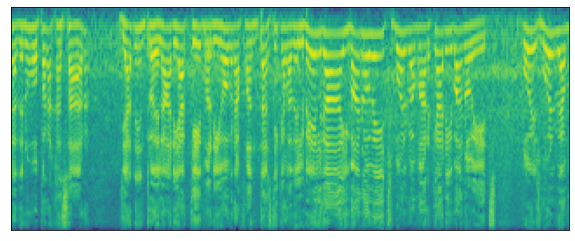

In [30]:
import matplotlib.pyplot as plt
train_set_all.set_window_size(8)
plt.figure(figsize=(10,10))
plt.imshow(train_set_all[0]['ms_spot'])
plt.xticks([])
plt.yticks([])
plt.savefig("melspec_goal.png")
plt.show()


In [12]:
train_set_all[0]

{'vidpath': 'england_epl/2014-2015/2015-02-21 - 18-00 Chelsea 1 - 1 Burnley',
 'annotation': {'gameTime': '1 - 13:10',
  'label': 'soccer-ball',
  'team': 'home'},
 'duration:': 2700,
 'label': 2,
 'lang': {'lang': 'esp'},
 'idx': 0,
 'ms_idx': (31440, 31760),
 'ms_spot': tensor([[0.8019, 0.8019, 0.8019,  ..., 0.8019, 0.8019, 0.8019],
         [0.3999, 0.3352, 0.4297,  ..., 0.2905, 0.3706, 0.4232],
         [0.3524, 0.2877, 0.3822,  ..., 0.2430, 0.3231, 0.3757],
         ...,
         [0.4876, 0.4695, 0.4483,  ..., 0.5445, 0.4160, 0.4477],
         [0.4208, 0.4163, 0.4419,  ..., 0.3974, 0.3275, 0.3948],
         [0.2886, 0.3235, 0.3079,  ..., 0.2049, 0.2351, 0.3117]]),
 'resnet_idx': (1572, 1588),
 'resnet_spot': array([[ 11.646947  ,   2.4463487 ,  -9.085399  , ...,   0.04613673,
           0.09468769,   0.24734607],
        [ 10.989137  ,   0.6243078 ,  -8.069212  , ...,   0.29369536,
          -0.3470794 ,  -0.08589901],
        [ 12.1971    ,   0.42378917, -10.228531  , ...,   0.52

In [10]:
# window size
train_set_all.set_window_size(w)
valid_set_all.set_window_size(w)


In [13]:
trainloader_all = DataLoader(train_set_all,**params)
validloader_all = DataLoader(valid_set_all,**params)


In [25]:
model,_,_ = generate_modelel()

In [26]:
for idx,e in enumerate(trainloader_all):
    print(e['ms_spot'].size())
    model(e['ms_spot'])
    break

torch.Size([32, 128, 320])


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 1, 7, 7], but got 3-dimensional input of size [32, 128, 320] instead

In [35]:
train_set_all[1]['ms_spot'].shape

torch.Size([128, 320])

In [57]:
train_set_all[1]['label']

0

In [36]:
import matplotlib.pyplot as plt

<Figure size 720x720 with 0 Axes>

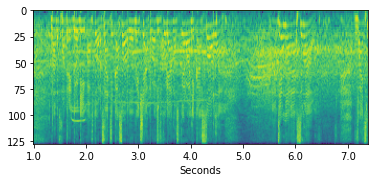

In [28]:
time_conversion = np.arange(320)
plt.figure(figsize=(10,10))
ax,fig = plt.subplots(1,1)
fig.imshow(train_set_all[10]['ms_spot'])

fig.set_xticklabels(np.arange(320/40))
fig.set_xlabel("Seconds")
ax.show()


# Case 1: Trained on all, test and evaluate on all, english, other

In [23]:
windows = [2,4,8,16,32,64]

In [24]:
import torchvision
import torch.optim as optim
import torch.nn as nn
def generate_model():
    model = torchvision.models.resnet18(pretrained=True)
    model.conv1 = nn.Conv2d(1,64,kernel_size=(7,7),stride=(2,2),padding=(3,3),bias=False)
    model.fc = nn.Linear(512,4,bias=True)
    #resnet.features.conv0 = nn.Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    #resnet.classifier = nn.Linear(in_features=densenet.classifier.in_features, out_features=3,bias=True)


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    return model, criterion,optimizer

In [ ]:
# Scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 7, gamma=0.1)

In [15]:
window_accs = list()
for w in windows:
    
    train_set_all.set_window_size(w)
    valid_set_all.set_window_size(w)
    
    trainloader = DataLoader(train_set_all,**params)
    validloader = DataLoader(valid_set_all,**params)
    
    model, criterion,optimizer = generate_model()
    resnet,eng = training_helper.train_model(model=model,
           epochs=15,
           trainloader=trainloader,
           validloader=validloader,
           criterion=criterion,
           optimizer=optimizer,
           device=device)
    
    best_acc = training_helper.evaluate_model(resnet,validloader,device)
    window_accs.append(best_acc)
    

new best acc
 Accuracy : 0.44717949628829956
new best acc
 Accuracy : 0.4887179434299469
new best acc
 Accuracy : 0.5097435712814331
new best acc
 Accuracy : 0.5230769515037537
new best acc
 Accuracy : 0.5353845953941345
new best acc
 Accuracy : 0.5405128002166748
new best acc
 Accuracy : 0.5574358701705933
new best acc
 Accuracy : 0.5605128407478333
 Accuracy : 0.5574358701705933
 Accuracy : 0.5446153879165649
 Accuracy : 0.5497435927391052
 Accuracy : 0.5482051372528076
 Accuracy : 0.5569230914115906
 Accuracy : 0.5600000023841858
 Accuracy : 0.5482051372528076
Finished Training
Accuracy : 0.5605128407478333
new best acc
 Accuracy : 0.49589744210243225
new best acc
 Accuracy : 0.535897433757782
new best acc
 Accuracy : 0.582564115524292
new best acc
 Accuracy : 0.5846154093742371
new best acc
 Accuracy : 0.5964102745056152
 Accuracy : 0.5892307758331299
 Accuracy : 0.5846154093742371
new best acc
 Accuracy : 0.6189743876457214
 Accuracy : 0.588205099105835
 Accuracy : 0.6025640964508

In [15]:
print(window_accs)

[tensor(0.5456), tensor(0.6185), tensor(0.6523), tensor(0.6692), tensor(0.6431), tensor(0.5744)]


In [16]:
for ws,wacc in zip(windows,window_accs):
    print(f"w : {ws}, w_acc : {wacc}")

w : 2, w_acc : 0.5456410050392151
w : 4, w_acc : 0.618461549282074
w : 8, w_acc : 0.6523076891899109
w : 16, w_acc : 0.6692307591438293
w : 32, w_acc : 0.6430768966674805
w : 64, w_acc : 0.5743589997291565


# case 2 with scheduler

In [14]:
windows = [2,4,8,16,32,64]

In [31]:
window_accs = list()

for w in windows:
    
    train_set_all.set_window_size(w)
    valid_set_all.set_window_size(w)
    
    trainloader = DataLoader(train_set_all,**params)
    validloader = DataLoader(valid_set_all,**params)
    
    model, criterion,optimizer = generate_model()
    # Scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.1)
    resnet,eng = training_helper.train_model_ws(model=model,
           epochs=25,
           trainloader=trainloader,
           validloader=validloader,
           criterion=criterion,
           optimizer=optimizer,
           scheduler=scheduler,
           device=device,
        tensorboard_name="window_size_25e_v4_"+str(w))
    
    best_acc = training_helper.evaluate_model(resnet,validloader,device)
    torch.save(resnet.state_dict(), "./best_model_"+str(w)+".pth")
    window_accs.append(best_acc)

new best acc
 Accuracy : 0.5799999833106995
 Accuracy : 0.5676922798156738
new best acc
 Accuracy : 0.6005128026008606
 Accuracy : 0.5774359107017517
 Accuracy : 0.5661538243293762
 Accuracy : 0.5374358892440796
 Accuracy : 0.5917948484420776
 Accuracy : 0.5794872045516968
 Accuracy : 0.54666668176651
new best acc
 Accuracy : 0.6179487109184265
new best acc
 Accuracy : 0.6276922821998596
 Accuracy : 0.617435872554779
 Accuracy : 0.626153826713562
new best acc
 Accuracy : 0.6297435760498047
 Accuracy : 0.6225640773773193
 Accuracy : 0.6256410479545593
 Accuracy : 0.6287179589271545
new best acc
 Accuracy : 0.6302564144134521
new best acc
 Accuracy : 0.6307692527770996
 Accuracy : 0.6235897541046143
 Accuracy : 0.629230797290802
new best acc
 Accuracy : 0.634871780872345
 Accuracy : 0.6317948698997498
 Accuracy : 0.629230797290802
 Accuracy : 0.6235897541046143
Finished Training
Accuracy : 0.634871780872345
new best acc
 Accuracy : 0.5969230532646179
new best acc
 Accuracy : 0.6251282095

In [38]:
for ws,wacc in zip(windows,window_accs):
    print(f"w : {ws}, w_acc : {wacc}")

w : 2, w_acc : 0.634871780872345
w : 4, w_acc : 0.6846153736114502
w : 8, w_acc : 0.7246153950691223
w : 16, w_acc : 0.7415384650230408
w : 32, w_acc : 0.7461538314819336
w : 64, w_acc : 0.6866666674613953


In [27]:
test_set_all[0]

NameError: name 'test_set_all' is not defined

# Train with best, lowest window_size

In [ ]:
# save model for feature generation

# test on testset

In [41]:
test_set_all = soccernet_dataset_generic(npy_file=test_list,root_dir=root_dir,lang='all',lang_dict=langpath_test)

test_set_all.load_waves()
test_set_all.generate_mel_spectrograms(load_features=True)
test_set_all.load_resnet_features()

testloader_all = DataLoader(test_set_all,**params)


100%|██████████| 100/100 [00:01<00:00, 71.39it/s]


In [45]:
window_accs_test = list()

for w in windows:
    
    test_set_all.set_window_size(w)
    testloader_all = DataLoader(test_set_all,**params)
    
    model, _,_ = generate_model()
    model.load_state_dict(torch.load("./best_model_"+str(w)+".pth"))
    
    best_acc = training_helper.evaluate_model(resnet,testloader_all,device)
    window_accs_test.append(best_acc)
    print(f"{w} : , acc: {best_acc}")

Accuracy : 0.37593236565589905
2 : , acc: 0.37593236565589905
Accuracy : 0.5947290062904358
4 : , acc: 0.5947290062904358
Accuracy : 0.734957754611969
8 : , acc: 0.734957754611969
Accuracy : 0.7235206365585327
16 : , acc: 0.7235206365585327
Accuracy : 0.6011934280395508
32 : , acc: 0.6011934280395508


RuntimeError: Caught RuntimeError in DataLoader worker process 3.
Original Traceback (most recent call last):
  File "/home/oarongve/.local/share/virtualenvs/project-daredevil-8eBKzQn6/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 198, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/oarongve/.local/share/virtualenvs/project-daredevil-8eBKzQn6/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/home/oarongve/.local/share/virtualenvs/project-daredevil-8eBKzQn6/lib/python3.6/site-packages/torch/utils/data/_utils/collate.py", line 73, in default_collate
    return {key: default_collate([d[key] for d in batch]) for key in elem}
  File "/home/oarongve/.local/share/virtualenvs/project-daredevil-8eBKzQn6/lib/python3.6/site-packages/torch/utils/data/_utils/collate.py", line 73, in <dictcomp>
    return {key: default_collate([d[key] for d in batch]) for key in elem}
  File "/home/oarongve/.local/share/virtualenvs/project-daredevil-8eBKzQn6/lib/python3.6/site-packages/torch/utils/data/_utils/collate.py", line 55, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [128, 2560] at entry 0 and [128, 2354] at entry 18


In [ ]:
for ws,wacc in zip(windows,window_accs_test):
    print(f"w : {ws}, w_acc : {wacc}")

# Deeper net

In [39]:
import torchvision
import torch.optim as optim
import torch.nn as nn
def generate_model_deep():
    model = torchvision.models.resnet34()
    model.conv1 = nn.Conv2d(1,64,kernel_size=(7,7),stride=(2,2),padding=(3,3),bias=False)
    model.fc = nn.Linear(512,4,bias=True)
    #resnet.features.conv0 = nn.Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    #resnet.classifier = nn.Linear(in_features=densenet.classifier.in_features, out_features=3,bias=True)


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    return model, criterion,optimizer

In [40]:
train_set_all.set_window_size(8)
valid_set_all.set_window_size(8)

trainloader = DataLoader(train_set_all,**params)
validloader = DataLoader(valid_set_all,**params)

model, criterion,optimizer = generate_model_deep()
# Scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10, gamma=0.1)
resnet,eng = training_helper.train_model_ws(model=model,
       epochs=25,
       trainloader=trainloader,
       validloader=validloader,
       criterion=criterion,
       optimizer=optimizer,
       scheduler=scheduler,
       device=device,
    tensorboard_name="window_size_25e_v4_deep"+str(8))

best_acc = training_helper.evaluate_model(resnet,validloader,device)
torch.save(resnet.state_dict(), "./best_model_deep_"+str(w)+".pth")
window_accs.append(best_acc)

new best acc
 Accuracy : 0.5661538243293762
new best acc
 Accuracy : 0.6471794843673706
new best acc
 Accuracy : 0.6502563953399658
new best acc
 Accuracy : 0.6589743494987488
 Accuracy : 0.6364102363586426
 Accuracy : 0.6010256409645081
 Accuracy : 0.5333333611488342
new best acc
 Accuracy : 0.6646153926849365
 Accuracy : 0.5687179565429688
new best acc
 Accuracy : 0.7297435998916626
new best acc
 Accuracy : 0.7312820553779602
 Accuracy : 0.7302564382553101
 Accuracy : 0.7271794676780701
 Accuracy : 0.7261538505554199
 Accuracy : 0.7256410121917725
 Accuracy : 0.728205144405365
 Accuracy : 0.7287179231643677
 Accuracy : 0.7266666889190674
 Accuracy : 0.7200000286102295
 Accuracy : 0.7215384840965271
 Accuracy : 0.7241025567054749
 Accuracy : 0.7251282334327698
 Accuracy : 0.7287179231643677
 Accuracy : 0.7276923060417175
 Accuracy : 0.7220512628555298
Finished Training
Accuracy : 0.7312820553779602
